In [30]:
import sys
sys.path.insert(0, '../')



In [31]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Training...
 [ 40000 / 40000 ] 100% - 113.35 it/s - 0:00:00 left  - quantization error: 0.0036942985903875244

...ready!


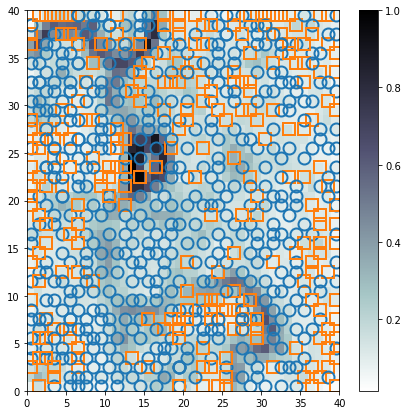

In [32]:
%autoreload 2
dataa = np.genfromtxt('./data/kaggle/diabetes2_no_labels_no_train.csv', delimiter=',', usecols=(0, 1, 2, 3, 4, 5, 6, 7))
# data normalization
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, dataa)
# Initialization and training
som = MiniSom(40, 40, 8, sigma=3, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)
som.pca_weights_init(data)
print("Training...")
som.train_batch(data, 40000, verbose=True)  # random training
print("\n...ready!")

plt.figure(figsize=(7, 7))
# Plotting the response for each pattern in the iris dataset
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

target = np.genfromtxt('./data/kaggle/diabetes_no_labels_train.csv', delimiter=',', usecols=(8), dtype=str)
t = np.zeros(len(target), dtype=int)
t[target == 'NO'] = 0
t[target == 'YES'] = 1


# use different colors and markers for each label
markers = ['o', 's']
colors = ['C0', 'C1']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
plt.axis([0, 40, 0, 40])
plt.savefig('./som_iris.png')
plt.show()


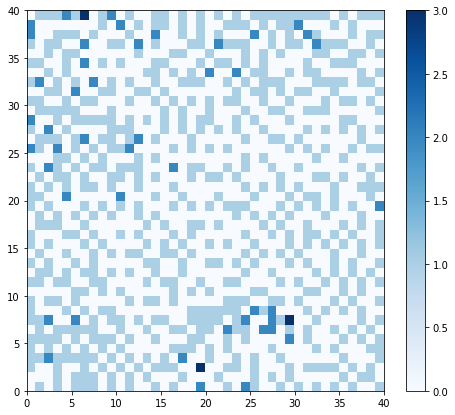

In [33]:
plt.figure(figsize=(8, 7))
frequencies = som.activation_response(data)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.savefig('./som_iris2.png')
plt.show()


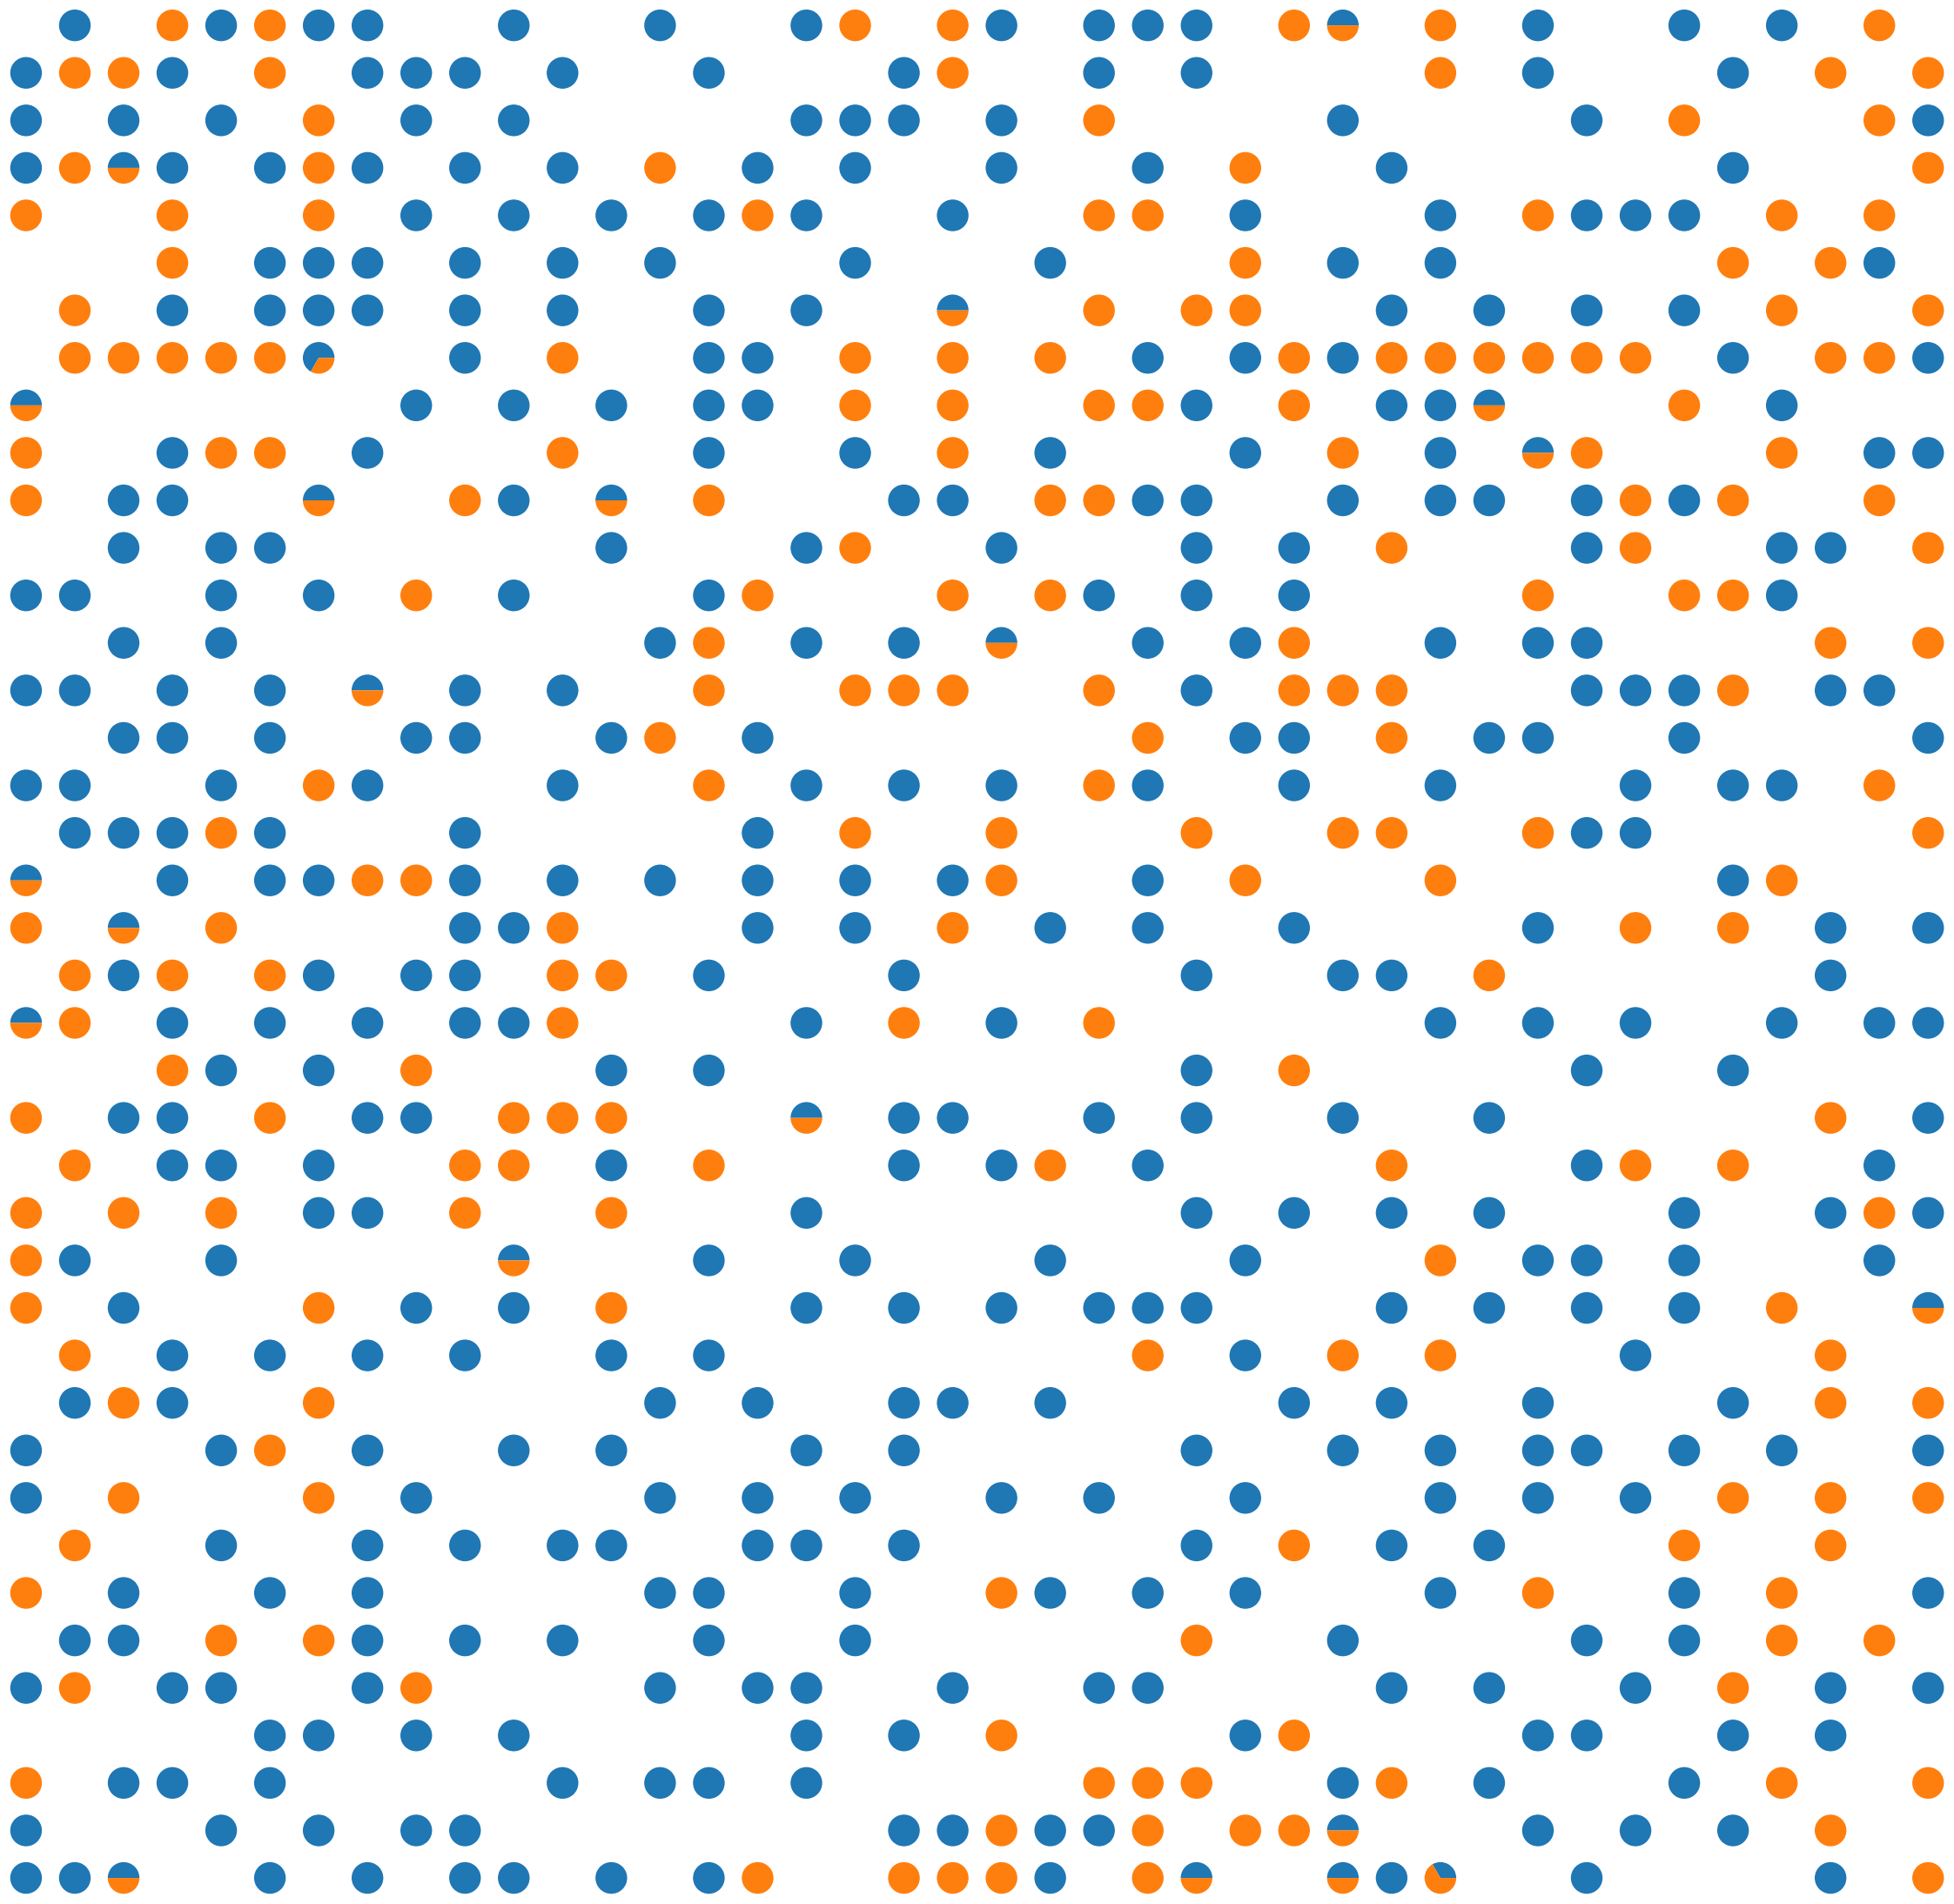

In [34]:
label = np.genfromtxt('./data/kaggle/diabetes2_no_labels_no_train.csv', delimiter=',', usecols=(8), dtype=str)
labels_map = som.labels_map(dataa, label)
label_names = np.unique(label)
plt.figure(figsize=(40, 40))
the_grid = GridSpec(40, 40)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.savefig('./data/som_iris_pies.png')
plt.show()


iteration=39999 status=100.00% error=0.0038348674801192734

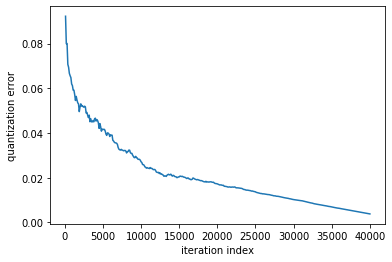

In [35]:
som = MiniSom(40, 40, 8, sigma=3, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)
som.pca_weights_init(data)
max_iter = 40000
q_error_pca_init = []
iter_x = []
for i in range(max_iter):
    percent = 100*(i+1)/max_iter
    rand_i = np.random.randint(len(data)) # This corresponds to train_random() method.
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    if (i+1) % 100 == 0:
        error = som.quantization_error(data)
        q_error_pca_init.append(error)
        iter_x.append(i)
        sys.stdout.write(f'\riteration={i:2d} status={percent:0.2f}% error={error}')
        
plt.plot(iter_x, q_error_pca_init)
plt.ylabel('quantization error')
plt.xlabel('iteration index')
plt.savefig('./data/quantaziation_error.png')

